# Import Required Libraries

In [1]:
import sys
import os
os.chdir("..")
os.chdir("..")
os.chdir("./src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

from ICA import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'FastICA'

# Source Generation and Mixing Scenario

In [3]:
# Generate the sources and mixtures
S, X, A = generate_synthetic_data_SMICA(seed=np.random.randint(2500))

# Visualize Generated Sources and Mixtures

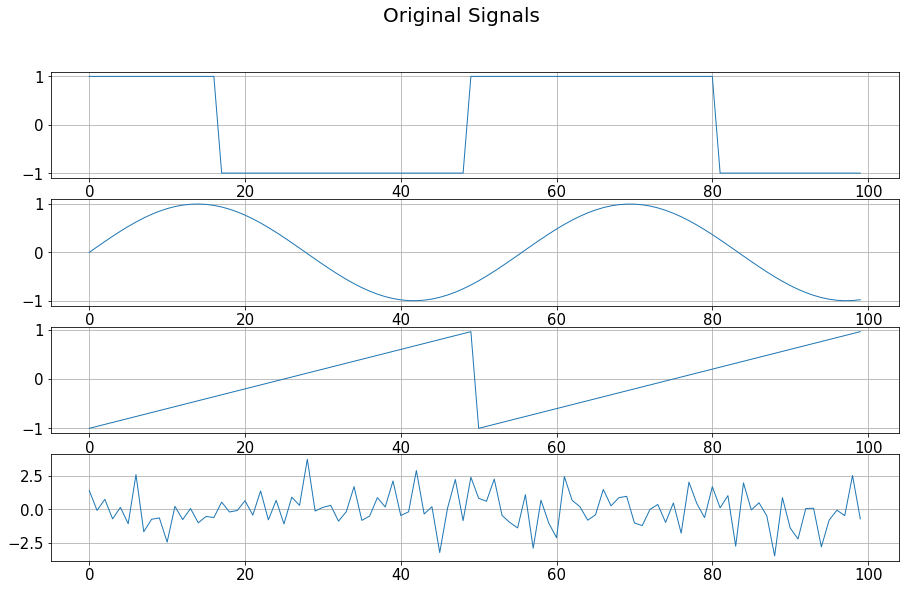

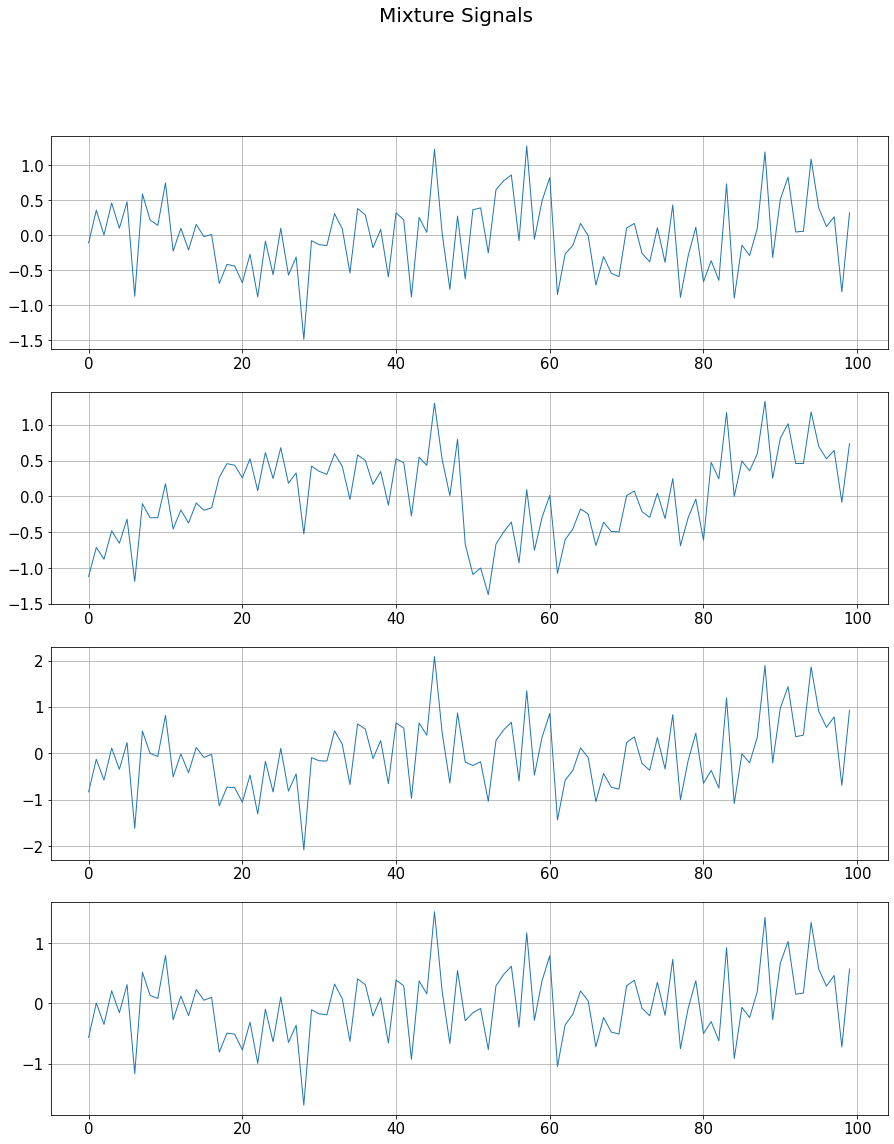

In [4]:
subplot_1D_signals(S[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(X[:,0:100], title = 'Mixture Signals', figsize = (15,18), colorcode = None)

# Run FastICA Algorithm on Mixture Signals

In [5]:
NumberofSources = 4
NumberofMixtures = NumberofSources
model = FastICA(s_dim = NumberofSources, x_dim = NumberofMixtures)

In [6]:
Y = model.fit_transform(X, n_epochs = 1)

100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


# Calculate Resulting Component SNRs and Overall SINR

In [7]:
Y_ = signed_and_permutation_corrected_sources(S,Y)
coef_ = ((Y_ * S).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr(S, Y_)))

SINRwsm = 10*np.log10(CalculateSINR(Y_, S)[0])

print("Overall SINR : {}".format(SINRwsm))

Component SNR Values : [66.724986   49.54095581 32.98517389 36.12763207]

Overall SINR : 37.64076071486908


In [8]:
Y = model.predict(X)
Y_ = signed_and_permutation_corrected_sources(S,Y)
coef_ = ((Y_ * S).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr(S, Y_)))

SINRwsm = 10*np.log10(CalculateSINR(Y_, S)[0])

print("Overall SINR : {}".format(SINRwsm))

Component SNR Values : [66.72499179 49.54097621 32.98415821 36.04481853]

Overall SINR : 37.64075009613924


# Vizualize Extracted Signals Compared to Original Sources

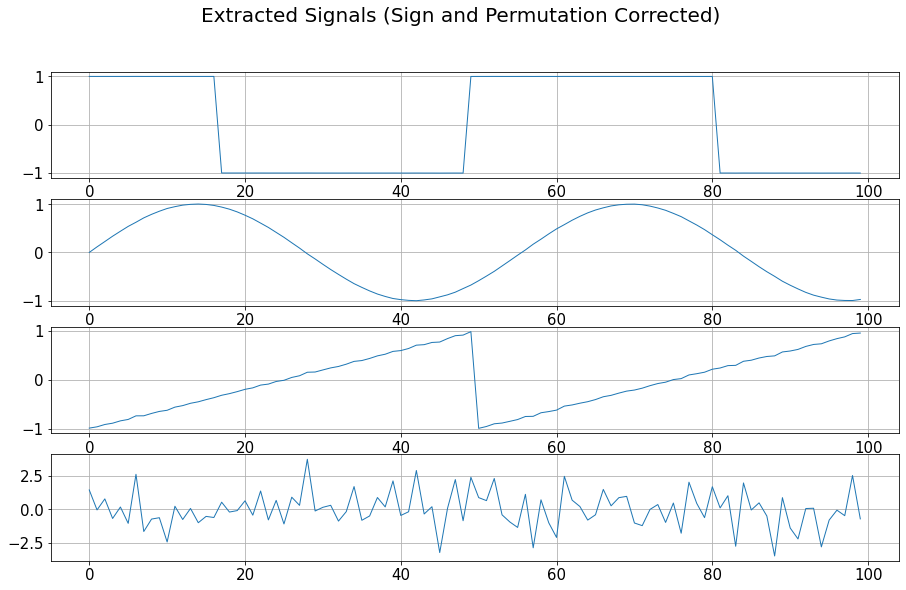

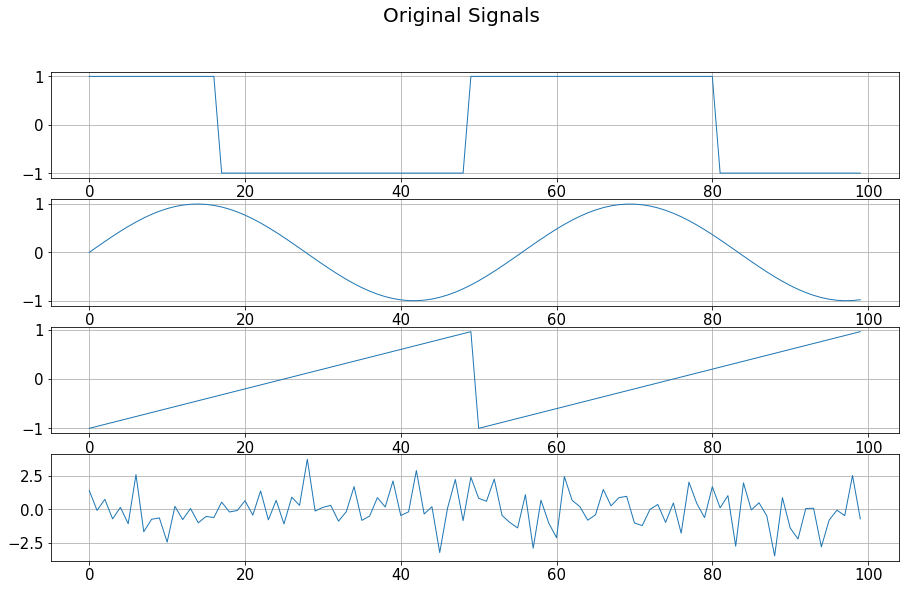

In [9]:
subplot_1D_signals(Y_[:,0:100], title = 'Extracted Signals (Sign and Permutation Corrected)', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(S[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)